In [3]:
import networkx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.8.2'

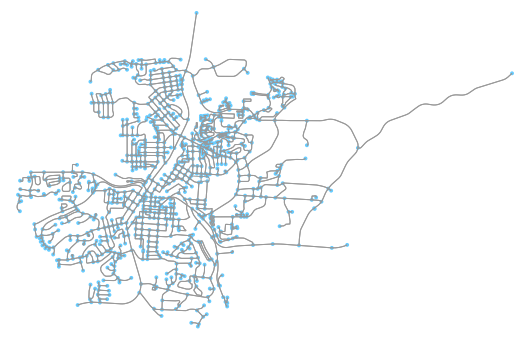

In [8]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

In [9]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

31710800.3787863